In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
print("학습셋 이미지 수: %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d개" % (X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


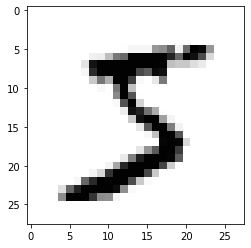

In [5]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [8]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [9]:
X_train = X_train.astype('float64')
X_train = X_train/ 255

In [10]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [11]:
print("class : %d" % (y_train[0]))

class : 5


In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [14]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
# from tensorflow.keras.models import Sequentail
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [16]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation ='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
modelpath='MNIST_MLP.hdf5'
cp = ModelCheckpoint(filepath=modelpath, monitor= 'val_loss', verbose=1, save_best_only=True)
esc = EarlyStopping(monitor='val_loss', patience=10)

In [22]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=9, callbacks=[cp,esc])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.19344, saving model to MNIST_MLP.hdf5
Epoch 2/30

Epoch 2: val_loss improved from 0.19344 to 0.14147, saving model to MNIST_MLP.hdf5
Epoch 3/30

Epoch 3: val_loss improved from 0.14147 to 0.11238, saving model to MNIST_MLP.hdf5
Epoch 4/30

Epoch 4: val_loss improved from 0.11238 to 0.10163, saving model to MNIST_MLP.hdf5
Epoch 5/30

Epoch 5: val_loss improved from 0.10163 to 0.09399, saving model to MNIST_MLP.hdf5
Epoch 6/30

Epoch 6: val_loss improved from 0.09399 to 0.08338, saving model to MNIST_MLP.hdf5
Epoch 7/30

Epoch 7: val_loss did not improve from 0.08338
Epoch 8/30

Epoch 8: val_loss improved from 0.08338 to 0.08261, saving model to MNIST_MLP.hdf5
Epoch 9/30

Epoch 9: val_loss did not improve from 0.08261
Epoch 10/30

Epoch 10: val_loss did not improve from 0.08261
Epoch 11/30

Epoch 11: val_loss did not improve from 0.08261
Epoch 12/30

Epoch 12: val_loss improved from 0.08261 to 0.08213, saving model to MNIST_MLP.hdf5
Ep

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

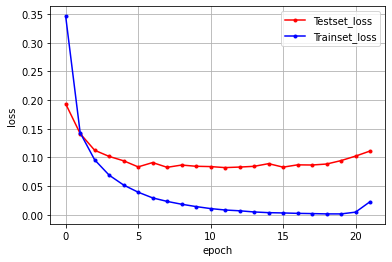

In [27]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()